In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
new_path = os.path.join(os.getcwd(),'data_Xentech_copy')
new_path

f_lists = os.listdir(new_path)
print("File Lists : ", f_lists)

File Lists :  ['data-2022.09.06.csv', 'data-2022.09.07.csv', 'data-2022.09.08.csv', 'data-2022.09.09.csv', 'data-2022.09.10.csv', 'data-2022.09.13.csv', 'data-2022.09.14.csv', 'data-2022.09.15.csv', 'data-2022.09.16.csv', 'data-2022.09.17.csv', 'data-2022.09.23.csv', 'data-2022.09.24.csv', 'data-2022.09.27.csv', 'data-2022.09.28.csv', 'data-2022.09.29.csv', 'data-2022.09.30.csv', 'data-2022.10.01.csv', 'data-2022.10.05.csv', 'data-2022.10.06.csv', 'data-2022.10.07.csv', 'data-2022.10.08.csv', 'data-2022.10.12.csv', 'data-2022.10.13.csv', 'data-2022.10.14.csv', 'data-2022.10.15.csv', 'data-2022.10.18.csv', 'data-2022.10.19.csv', 'data-2022.10.20.csv', 'data-2022.10.21.csv', 'data-2022.10.22.csv', 'data-2022.10.25.csv', 'data-2022.10.26.csv', 'data-2022.10.27.csv', 'Error Lot list.csv']


In [3]:
dataList=list()
cnt = 0

for pth in glob.glob(new_path+'/*')[:-1]:
    origin = pd.read_csv(pth,index_col=False)
    origin['Date'] = "-".join(pth.split('-')[-1].split(".")[:-1])
    cnt = cnt+len(origin)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Lot,Time,pH,Temp,Current,Date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2022-09-06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2022-09-06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2022-09-06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2022-09-06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...,...,...
50089,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2022-10-27
50090,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2022-10-27
50091,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2022-10-27
50092,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2022-10-27


In [4]:
df = CatList.drop(['Index','Time'], axis=1, inplace=False)
df

,Lot,pH,Temp,Current,Date
0,1,10.37,42.87,7.34,2022-09-06
1,1,10.90,42.70,8.26,2022-09-06
2,1,9.61,42.37,8.46,2022-09-06
3,1,10.32,45.85,8.04,2022-09-06
4,1,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...
50089,22,9.79,43.52,8.55,2022-10-27
50090,22,9.53,44.44,7.36,2022-10-27
50091,22,9.86,46.54,8.15,2022-10-27
50092,22,10.52,47.88,7.97,2022-10-27


In [5]:
df.shape

(50094, 5)

In [6]:
df.describe()

,Lot,pH,Temp,Current
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,10.273346,45.023847,7.974549
std,6.344352,0.453278,1.661687,0.601907
min,1.000000,9.510000,42.010000,5.510000
25%,6.000000,9.900000,43.670000,7.500000
50%,11.500000,10.260000,45.020000,7.990000
75%,17.000000,10.630000,46.360000,8.470000
max,22.000000,11.990000,51.980000,8.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Current  50094 non-null  float64
 4   Date     50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Lot        0
pH         0
Temp       0
Current    0
Date       0
dtype: int64

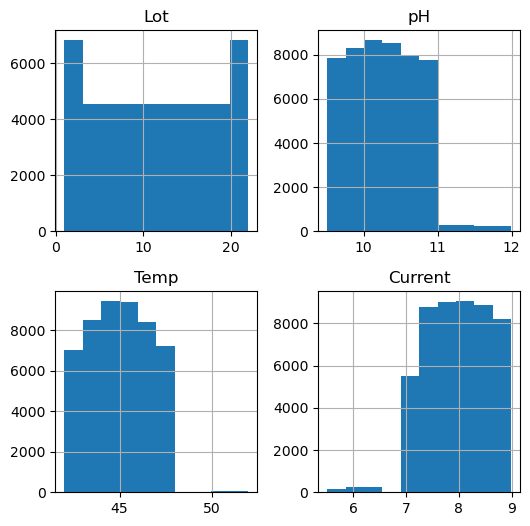

In [9]:
df.hist(figsize=(6,6))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix

,Lot,pH,Temp,Current
Lot,1.000000,-0.001241,-0.001545,-0.004212
pH,-0.001241,1.000000,0.001407,-0.026063
Temp,-0.001545,0.001407,1.000000,-0.000786
Current,-0.004212,-0.026063,-0.000786,1.000000


<Axes: >

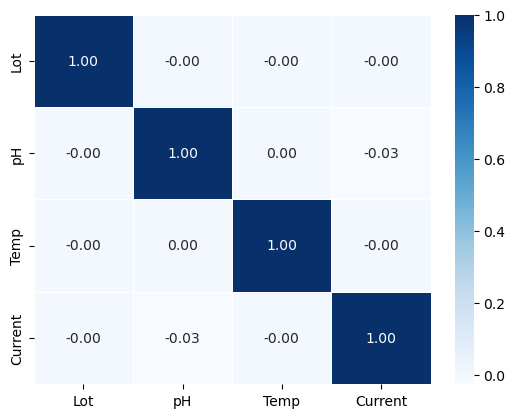

In [11]:
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [12]:
lot_lists = df['Lot'].unique()
lot_lists

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [13]:
d_lists = df['Date'].unique()
d_lists

array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
       '2022-09-10', '2022-09-13', '2022-09-14', '2022-09-15',
       '2022-09-16', '2022-09-17', '2022-09-23', '2022-09-24',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-12', '2022-10-13', '2022-10-14',
       '2022-10-15', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-25', '2022-10-26',
       '2022-10-27'], dtype=object)

In [14]:
df_er = pd.read_csv(glob.glob(new_path+'/*')[-1],index_col=False)
df_er

,Index,Date,LoT,LoT2
0,1,2022-09-06,NaN,NaN
1,2,2022-09-07,13.0,NaN
2,3,2022-09-08,NaN,NaN
3,4,2022-09-09,NaN,NaN
4,5,2022-09-10,NaN,NaN
5,6,2022-09-13,NaN,NaN
6,7,2022-09-14,5.0,NaN
7,8,2022-09-15,5.0,NaN
8,9,2022-09-16,NaN,NaN
9,10,2022-09-17,NaN,NaN


In [15]:
er_drop = df_er.dropna(thresh=3, axis=0)
lot_er_list = er_drop['LoT'].unique()
lot_er_list

array([13.,  5.,  9.,  8., 17., 19., 14.,  1., 15.])

In [16]:
d_er_list = er_drop['Date'].unique()
d_er_list

array(['2022-09-07', '2022-09-14', '2022-09-15', '2022-09-23',
       '2022-09-29', '2022-10-01', '2022-10-05', '2022-10-06',
       '2022-10-08', '2022-10-20', '2022-10-22', '2022-10-25',
       '2022-10-26'], dtype=object)

In [17]:
df_total = pd.DataFrame(columns=['pH','Temp','Current','NG'])

In [18]:
for d in d_lists:
    for lot in lot_lists:
        tmp = df[(df['Date']==d)&(df['Lot']==lot)]
        tmp = tmp[['pH', 'Temp','Current']]
        er_df = er_drop[(er_drop['Date']==d)&
                              ((er_drop['LoT']==lot)|(er_drop['LoT2']==lot))]
        len_error = len(er_df)
        if len_error>0:
            trr = np.full((tmp['pH'].shape), 1)
        else:
            trr = np.full((tmp['pH'].shape), 0)
        tmp['NG'] = trr
        df_total = df_total.append(tmp)
df_total =  df_total.apply(pd.to_numeric)
df_total

,pH,Temp,Current,NG
0,10.37,42.87,7.34,0
1,10.90,42.70,8.26,0
2,9.61,42.37,8.46,0
3,10.32,45.85,8.04,0
4,10.36,44.18,7.23,0
...,...,...,...,...
50089,9.79,43.52,8.55,0
50090,9.53,44.44,7.36,0
50091,9.86,46.54,8.15,0
50092,10.52,47.88,7.97,0


In [19]:
df_total.describe()

,pH,Temp,Current,NG
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,10.273346,45.023847,7.974549,0.020661
std,0.453278,1.661687,0.601907,0.142249
min,9.510000,42.010000,5.510000,0.000000
25%,9.900000,43.670000,7.500000,0.000000
50%,10.260000,45.020000,7.990000,0.000000
75%,10.630000,46.360000,8.470000,0.000000
max,11.990000,51.980000,8.990000,1.000000


In [20]:
df_total.corr()

,pH,Temp,Current,NG
pH,1.000000,0.001407,-0.026063,0.026743
Temp,0.001407,1.000000,-0.000786,0.011250
Current,-0.026063,-0.000786,1.000000,-0.014376
NG,0.026743,0.011250,-0.014376,1.000000


<Axes: >

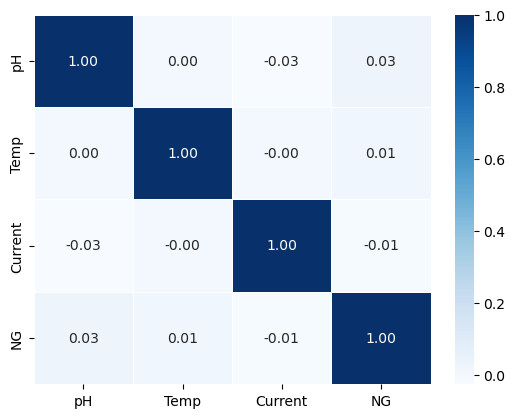

In [21]:
sns.heatmap(df_total.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [22]:
corr_matrix = df_total.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

In [23]:
df_total_copy = df_total.copy()

In [24]:
df_total_copy["ratio"] = df_total["pH"] / df_total["Current"]

In [25]:
corr_matrix = df_total_copy.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
ratio      0.028735
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

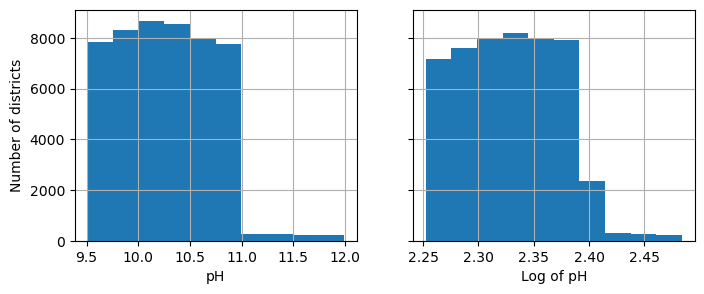

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["pH"].hist(ax=axs[0], bins=10)
df_total["pH"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("pH")
axs[1].set_xlabel("Log of pH")
axs[0].set_ylabel("Number of districts")
plt.show()

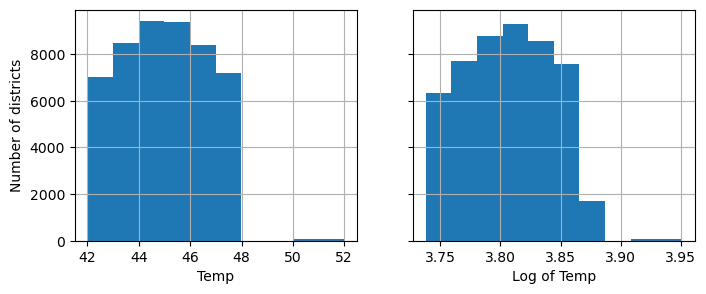

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["Temp"].hist(ax=axs[0], bins=10)
df_total["Temp"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("Temp")
axs[1].set_xlabel("Log of Temp")
axs[0].set_ylabel("Number of districts")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

df_total_data = df_total.drop(['NG'], axis=1) 
scaler = StandardScaler()
df_total_scale = scaler.fit_transform(df_total_data)
df_total_scale

array([[ 0.21323559, -1.29619347, -1.05424198],
       [ 1.38250699, -1.39850013,  0.47424872],
       [-1.46345548, -1.59709541,  0.80652931],
       ...,
       [-0.91191236,  0.91242678,  0.2914944 ],
       [ 0.54416146,  1.71884399, -0.00755813],
       [ 1.53693907, -1.20592289,  1.67045884]])

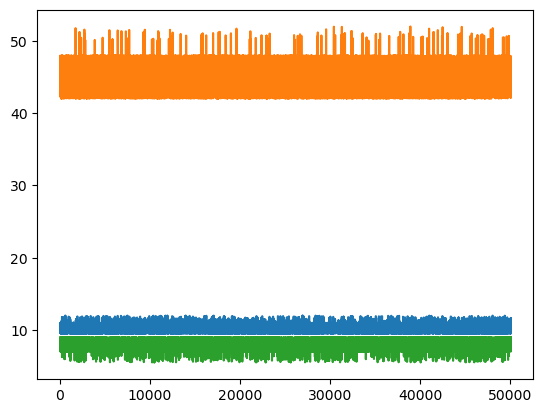

In [29]:
plt.plot(df_total_data)
plt.show()

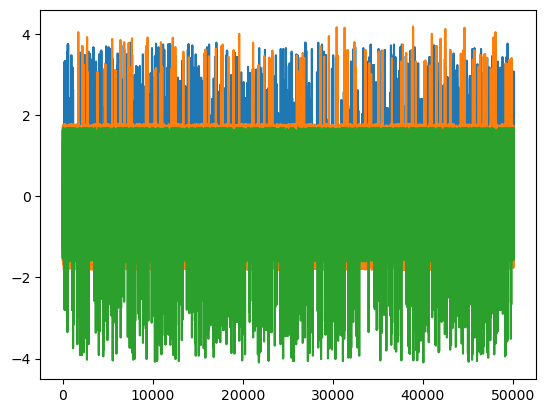

In [30]:
plt.plot(df_total_scale)
plt.show()

In [31]:
df_scale = pd.DataFrame(df_total_scale, columns=['pH', 'Temp', 'Current'])
df_scale['NG'] = df_total['NG']
df_scale

,pH,Temp,Current,NG
0,0.213236,-1.296193,-1.054242,0
1,1.382507,-1.398500,0.474249,0
2,-1.463455,-1.597095,0.806529,0
3,0.102927,0.497182,0.108740,0
4,0.191174,-0.507830,-1.236996,0
...,...,...,...,...
50089,-1.066344,-0.905021,0.956056,0
50090,-1.639949,-0.351361,-1.021014,0
50091,-0.911912,0.912427,0.291494,0
50092,0.544161,1.718844,-0.007558,0


In [32]:
train_data = df_scale[:41745]
test_data = df_scale[41745:]
train_data

,pH,Temp,Current,NG
0,0.213236,-1.296193,-1.054242,0
1,1.382507,-1.398500,0.474249,0
2,-1.463455,-1.597095,0.806529,0
3,0.102927,0.497182,0.108740,0
4,0.191174,-0.507830,-1.236996,0
...,...,...,...,...
41740,1.161890,-1.693384,0.324722,0
41741,0.941273,-1.609131,0.158582,0
41742,0.235297,-0.953165,0.706845,0
41743,0.257359,0.473110,1.404634,0


In [33]:
test_data

,pH,Temp,Current,NG
41745,0.610347,0.671705,0.756687,0
41746,-0.514801,-0.002315,1.687073,0
41747,-1.110468,-0.080550,-0.805032,0
41748,1.404569,-0.959183,1.304950,0
41749,-1.110468,-1.681348,0.507477,0
...,...,...,...,...
50089,-1.066344,-0.905021,0.956056,0
50090,-1.639949,-0.351361,-1.021014,0
50091,-0.911912,0.912427,0.291494,0
50092,0.544161,1.718844,-0.007558,0


In [34]:
ng_idx_train=train_data[train_data['NG']==1].index
ok_idx_train=train_data[train_data['NG']==0].index
ok_train=train_data.loc[ok_idx_train]
ng_train=train_data.loc[ng_idx_train]
ok_train

,pH,Temp,Current,NG
0,0.213236,-1.296193,-1.054242,0
1,1.382507,-1.398500,0.474249,0
2,-1.463455,-1.597095,0.806529,0
3,0.102927,0.497182,0.108740,0
4,0.191174,-0.507830,-1.236996,0
...,...,...,...,...
41740,1.161890,-1.693384,0.324722,0
41741,0.941273,-1.609131,0.158582,0
41742,0.235297,-0.953165,0.706845,0
41743,0.257359,0.473110,1.404634,0


In [35]:
TIME_STEP=23
def sequences(x,y,time_steps=TIME_STEP):
    xs,ys=[],[]
    for i in range(len(x)-time_steps):
        xs.append(x.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
        
    return np.array(xs), np.array(ys)
    
X_train, Y_train = sequences(ok_train[['pH','Temp','Current']],ok_train[['pH','Temp','Current']])
X_train

array([[[ 0.21323559, -1.29619347, -1.05424198],
        [ 1.38250699, -1.39850013,  0.47424872],
        [-1.46345548, -1.59709541,  0.80652931],
        ...,
        [ 0.80890216,  1.75495222,  0.30810843],
        [ 0.45591456, -0.55597469, -0.78841751],
        [ 0.87508733, -0.69438959,  0.37456454]],

       [[ 1.38250699, -1.39850013,  0.47424872],
        [-1.46345548, -1.59709541,  0.80652931],
        [ 0.10292697,  0.4971821 ,  0.10874007],
        ...,
        [ 0.45591456, -0.55597469, -0.78841751],
        [ 0.87508733, -0.69438959,  0.37456454],
        [-0.73541856,  0.16017193,  0.80652931]],

       [[-1.46345548, -1.59709541,  0.80652931],
        [ 0.10292697,  0.4971821 ,  0.10874007],
        [ 0.19117387, -0.50783038, -1.23699631],
        ...,
        [ 0.87508733, -0.69438959,  0.37456454],
        [-0.73541856,  0.16017193,  0.80652931],
        [-0.00738165, -1.24203112, -1.18715422]],

       ...,

       [[ 0.16911214, -0.35737941, -0.73857543],
        [-0

In [36]:
X_test, Y_test = sequences(test_data[['pH','Temp','Current']], test_data[['NG']])
X_test

array([[[ 6.10346634e-01,  6.71705229e-01,  7.56687219e-01],
        [-5.14801319e-01, -2.31512010e-03,  1.68707287e+00],
        [-1.11046788e+00, -8.05496249e-02, -8.05031544e-01],
        ...,
        [ 6.54470083e-01,  5.78652682e-02,  1.67045884e+00],
        [-8.23665463e-01,  9.06408744e-01, -1.57084398e-01],
        [-4.70677870e-01,  1.34572558e+00, -8.54873632e-01]],

       [[-5.14801319e-01, -2.31512010e-03,  1.68707287e+00],
        [-1.11046788e+00, -8.05496249e-02, -8.05031544e-01],
        [ 1.40456872e+00, -9.59183295e-01,  1.30495019e+00],
        ...,
        [-8.23665463e-01,  9.06408744e-01, -1.57084398e-01],
        [-4.70677870e-01,  1.34572558e+00, -8.54873632e-01],
        [-3.16245798e-01, -1.39850013e+00, -5.74002212e-02]],

       [[-1.11046788e+00, -8.05496249e-02, -8.05031544e-01],
        [ 1.40456872e+00, -9.59183295e-01,  1.30495019e+00],
        [-1.11046788e+00, -1.68134795e+00,  5.07476778e-01],
        ...,
        [-4.70677870e-01,  1.34572558e+00,

In [37]:
Y_test

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=int64)

In [38]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM
from keras import backend as K
from keras.layers import *
from keras.optimizers import Adam

In [39]:
X_train.shape

(41032, 23, 3)

In [66]:
timesteps = TIME_STEP
features = 3


Lstm_AE = Sequential()

Lstm_AE.add(LSTM(140,activation='relu', input_shape=(timesteps, features), return_sequences=True))
Lstm_AE.add(LSTM(70,activation='relu', return_sequences=False))
Lstm_AE.add(RepeatVector(timesteps))

Lstm_AE.add(LSTM(70,activation='relu', return_sequences=True))
Lstm_AE.add(LSTM(140,activation='relu', return_sequences=True))
Lstm_AE.add(TimeDistributed(Dense(features)))

Lstm_AE.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01))
Lstm_AE.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 23, 140)           80640     
                                                                 
 lstm_25 (LSTM)              (None, 70)                59080     
                                                                 
 repeat_vector_3 (RepeatVec  (None, 23, 70)            0         
 tor)                                                            
                                                                 
 lstm_26 (LSTM)              (None, 23, 70)            39480     
                                                                 
 lstm_27 (LSTM)              (None, 23, 140)           118160    
                                                                 
 time_distributed_3 (TimeDi  (None, 23, 3)             423       
 stributed)                                           

In [67]:
epochs=20
batch=32
history = Lstm_AE.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_split=0.2)

Epoch 1/20
1026/1026 [==============================] - 41s 37ms/step - loss: 81102384.0000 - val_loss: 18380.0684
Epoch 2/20
1026/1026 [==============================] - 38s 37ms/step - loss: 14153.3105 - val_loss: 1.0080
Epoch 3/20
1026/1026 [==============================] - 39s 38ms/step - loss: 0.9965 - val_loss: 1.0063
Epoch 4/20
1026/1026 [==============================] - 41s 40ms/step - loss: 0.9954 - val_loss: 1.0057
Epoch 5/20
1026/1026 [==============================] - 40s 39ms/step - loss: 0.9949 - val_loss: 1.0054
Epoch 6/20
1026/1026 [==============================] - 40s 39ms/step - loss: 0.9947 - val_loss: 1.0053
Epoch 7/20
1026/1026 [==============================] - 40s 39ms/step - loss: 0.9945 - val_loss: 1.0052
Epoch 8/20
1026/1026 [==============================] - 42s 40ms/step - loss: 0.9944 - val_loss: 1.0049
Epoch 9/20
1026/1026 [==============================] - 40s 39ms/step - loss: 0.9942 - val_loss: 1.0048
Epoch 10/20
1026/1026 [==========================

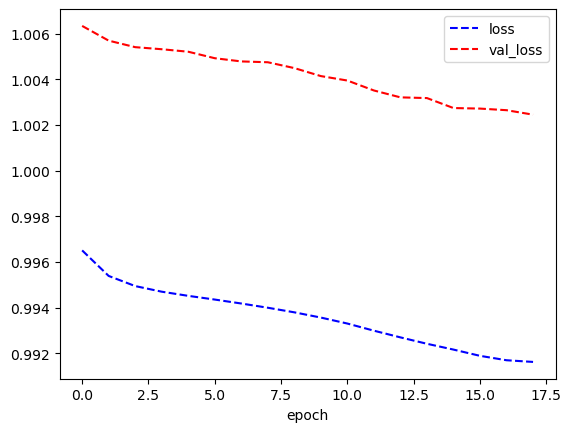

In [80]:
plt.plot(history.history['loss'][2:20], 'b--', label='loss')
plt.plot(history.history['val_loss'][2:20], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [69]:
prediction = Lstm_AE.predict(X_test)
prediction

261/261 [==============================] - 6s 21ms/step


array([[[-0.01300899,  0.02053799, -0.03067468],
        [-0.00878933,  0.00091846,  0.00972688],
        [-0.01318869, -0.01726599,  0.01463079],
        ...,
        [-0.0120311 , -0.00536182,  0.01516594],
        [-0.01172935, -0.00502624,  0.01595173],
        [-0.01141684, -0.00462896,  0.01678015]],

       [[-0.01300899,  0.02053799, -0.03067468],
        [-0.00878933,  0.00091846,  0.00972688],
        [-0.01318869, -0.01726599,  0.01463079],
        ...,
        [-0.0120311 , -0.00536182,  0.01516594],
        [-0.01172935, -0.00502624,  0.01595173],
        [-0.01141684, -0.00462896,  0.01678015]],

       [[-0.01300899,  0.02053799, -0.03067468],
        [-0.00878933,  0.00091846,  0.00972688],
        [-0.01318869, -0.01726599,  0.01463079],
        ...,
        [-0.0120311 , -0.00536182,  0.01516594],
        [-0.01172935, -0.00502624,  0.01595173],
        [-0.01141684, -0.00462896,  0.01678015]],

       ...,

       [[-0.01300899,  0.02053799, -0.03067468],
        [-0

In [70]:
mse=np.mean(np.power(X_test-prediction,2),axis=1)
error_df=pd.DataFrame(mse)
error_df.columns = ['pH_error', 'Temp_error', 'Current_error']
error_df['reconstruction_error'] =  error_df['pH_error'] + error_df['Temp_error'] + error_df['Current_error']

In [71]:
error_df['NG'] = Y_test[:,0]
error_df.describe()

,pH_error,Temp_error,Current_error,reconstruction_error,NG
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000
mean,1.007859,1.007927,1.014474,3.030261,0.041436
std,0.298093,0.250301,0.336299,0.523013,0.199309
min,0.432218,0.373374,0.327507,1.458076,0.000000
25%,0.800279,0.843077,0.799775,2.665941,0.000000
50%,0.948315,0.978779,0.932447,2.949461,0.000000
75%,1.152712,1.134840,1.142297,3.316909,0.000000
max,3.141867,3.109975,3.331285,5.467078,1.000000


In [72]:
thr = np.percentile(error_df['reconstruction_error'],95)
thr

3.9995322572741463

7909


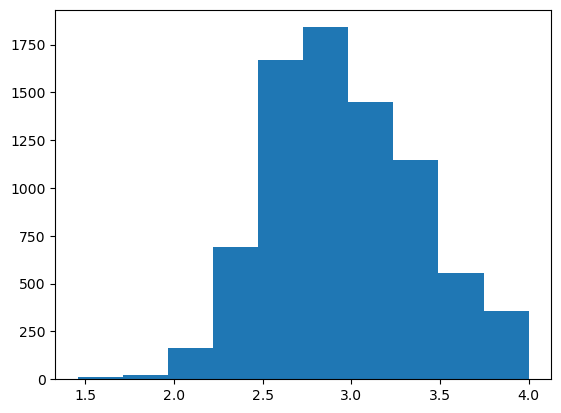

In [73]:
fig=plt.figure()
ax=fig.add_subplot(111)
error_df_0=error_df[error_df['reconstruction_error']<thr]
print(len(error_df_0))
_=ax.hist(error_df_0.reconstruction_error.values,bins=10)

417


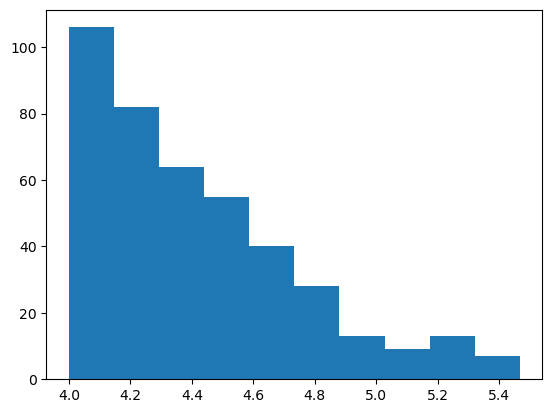

In [74]:
fig=plt.figure()
ax=fig.add_subplot(111)
error_df_1=error_df[error_df['reconstruction_error']>thr]
print(len(error_df_1))
_=ax.hist(error_df_1.reconstruction_error.values,bins=10)

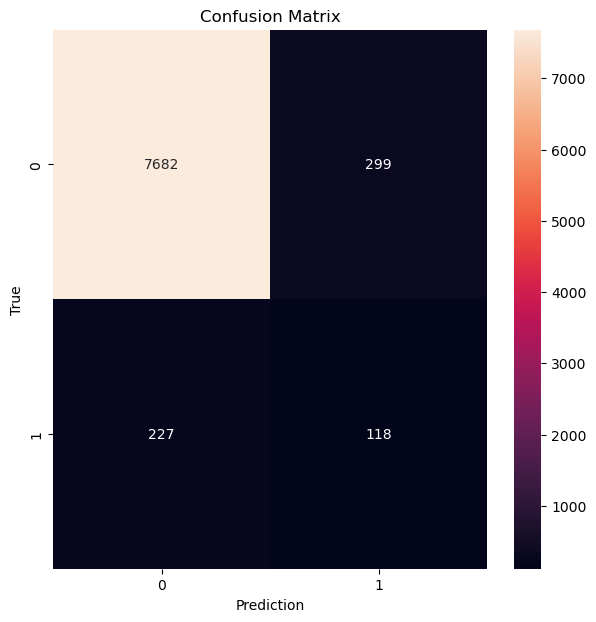

In [75]:
Y_predict=[1 if e>thr else 0 for e in error_df['reconstruction_error'].values]
conf_matrix=confusion_matrix(error_df['NG'],Y_predict)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction'); plt.ylabel('True')
plt.show()

In [76]:
TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[1][1]

Recall=TP/(TP+FN)
Precision = TP/(TP+FP)
Accuracy=(TP+TN)/(TP+FP+FN+TN)
F1_Score=2*(Recall*Precision)/(Recall+Precision)
Recall, Precision, Accuracy, F1_Score

(0.962536023054755, 0.9712985206726514, 0.9368244054768196, 0.966897419760856)

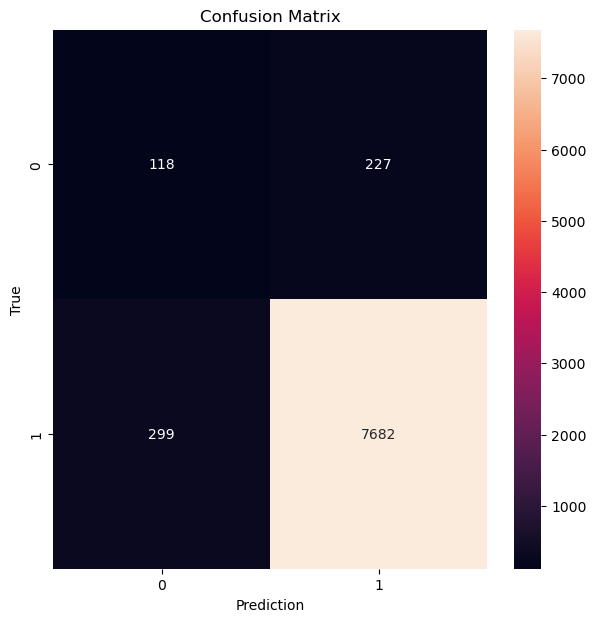

In [77]:
Y_predict2=[0 if e>thr else 1 for e in error_df['reconstruction_error'].values]
error_df['NG2'] = [1 if e==0 else 0 for e in error_df['NG'].values]
conf_matrix=confusion_matrix(error_df['NG2'],Y_predict2)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction'); plt.ylabel('True')
plt.show()

In [78]:
accuracy = accuracy_score(error_df['NG2'], Y_predict2)
precisioin = precision_score(error_df['NG2'], Y_predict2)
recall = recall_score(error_df['NG2'], Y_predict2)
f1 = f1_score(error_df['NG2'], Y_predict2)
roc_auc = roc_auc_score(error_df['NG2'], Y_predict2)
accuracy, precisioin, recall, f1, roc_auc 

(0.9368244054768196,
 0.9712985206726514,
 0.962536023054755,
 0.966897419760856,
 0.6522825042810008)

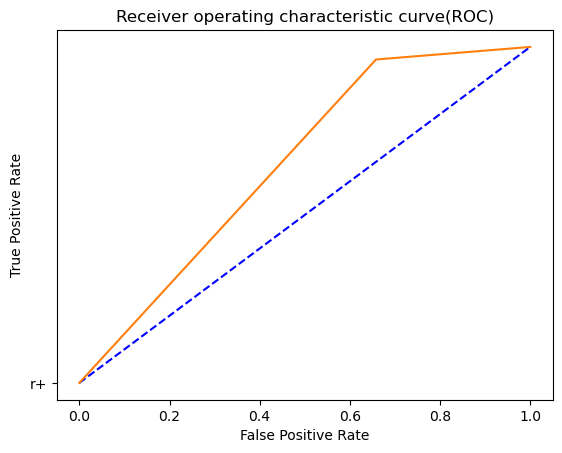

0.6522825042810008

In [79]:
fpr, tpr, thresholds = roc_curve(error_df['NG2'], Y_predict2)
plt.plot([0,1], [0,1], "b--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve(ROC)')
plt.show()
roc_auc